# **필요한 라이브러리 불러오기**


In [ ]:
import torch
import torch.nn as nn

In [ ]:
# GPU로 연산.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정.
# 실험 조건을 동일하게 설정하여,
# 같은 input을 넣으면 같은 결과가 나올 수 있도록 함.
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# **입력과 출력 정의**

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# **단층 퍼셉트론 설계**

In [ ]:
# 시그모이드 함수 사용.
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

# **비용 함수와 옵티마이저 정의**

In [ ]:
# 0 또는 1을 예측하는 이진 분류 문제이므로,
# cross entropy 함수 사용.
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

# **학습 시작**

In [ ]:
cost_list = []
total_epoch = [i for i in range(10000) if i%100==0]

# 10,000번의 epoch 수행.
for step in range(1, 10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    # 100번째 epoch마다 비용 출력
    if step % 100 == 0:
        print('Epoch: {}, Cost: {:.4f}'.format(step, cost.item()))
        cost_list.append(cost.item())

Epoch: 100, Cost: 0.6931
Epoch: 200, Cost: 0.6931
Epoch: 300, Cost: 0.6931
Epoch: 400, Cost: 0.6931
Epoch: 500, Cost: 0.6931
Epoch: 600, Cost: 0.6931
Epoch: 700, Cost: 0.6931
Epoch: 800, Cost: 0.6931
Epoch: 900, Cost: 0.6931
Epoch: 1000, Cost: 0.6931
Epoch: 1100, Cost: 0.6931
Epoch: 1200, Cost: 0.6931
Epoch: 1300, Cost: 0.6931
Epoch: 1400, Cost: 0.6931
Epoch: 1500, Cost: 0.6931
Epoch: 1600, Cost: 0.6931
Epoch: 1700, Cost: 0.6931
Epoch: 1800, Cost: 0.6931
Epoch: 1900, Cost: 0.6931
Epoch: 2000, Cost: 0.6931
Epoch: 2100, Cost: 0.6931
Epoch: 2200, Cost: 0.6931
Epoch: 2300, Cost: 0.6931
Epoch: 2400, Cost: 0.6931
Epoch: 2500, Cost: 0.6931
Epoch: 2600, Cost: 0.6931
Epoch: 2700, Cost: 0.6931
Epoch: 2800, Cost: 0.6931
Epoch: 2900, Cost: 0.6931
Epoch: 3000, Cost: 0.6931
Epoch: 3100, Cost: 0.6931
Epoch: 3200, Cost: 0.6931
Epoch: 3300, Cost: 0.6931
Epoch: 3400, Cost: 0.6931
Epoch: 3500, Cost: 0.6931
Epoch: 3600, Cost: 0.6931
Epoch: 3700, Cost: 0.6931
Epoch: 3800, Cost: 0.6931
Epoch: 3900, Cost: 0.

# **단층 퍼셉트론 예측값 확인**

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): \n', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): \n', predicted.detach().cpu().numpy())
    print('실제값(Y): \n', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis): 
 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted): 
 [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y): 
 [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


# **그래프로 cost 변화 확인**

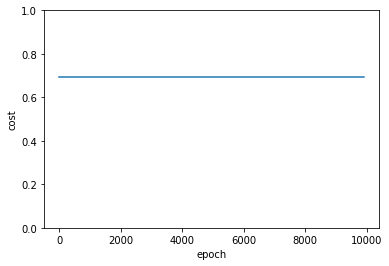

In [ ]:
import matplotlib.pyplot as plt

plt.plot(total_epoch, cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.ylim([0, 1])
plt.show()